In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# from sklearn.preprocessing import LabelEncoder
# from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

In [2]:
from prediction_models.train_models.DurationTrain import train_duration_prediction_model
from prediction_models.train_models.ImportanceTrain import train_importance_prediction_model
from prediction_models.train_models.StartTimeTrain2 import train_start_time_prediction_model_2
# from utils.DataPreparation import used_data, augment_with_synonyms
from utils.DataPreparation import used_data
from data_preprocessing import preprocess_data, augment_with_synonyms

from prediction_models.train_models.TypeTrain import train_type_prediction_model

In [3]:
# used_data = pd.read_csv('downloaded_dataset_og.csv')
used_data = pd.read_csv('downloaded_dataset.csv')

# all_copies = [used_data]
# for _ in range(2):
#     all_copies.append(used_data.copy())
# used_data = pd.concat(all_copies, ignore_index=True)

used_data

,TaskID,TaskName,Type,Importance,Duration,DayOfWeek,StartTime,EndTime,UserID
0,409,Clean out old files,Work,Normal,60,Monday,16:30,17:30,user1
1,1147,Update personal profiles,Personal,Less Important,15,Thursday,13:00,13:15,user1
2,902,Go to the supermarket,Personal,Normal,30,Tuesday,16:00,16:30,user1
3,547,Update personal profiles,Personal,Less Important,15,Thursday,13:00,13:15,user1
4,1628,Write a short story,Personal,Normal,90,Saturday,19:00,20:30,user1
...,...,...,...,...,...,...,...,...,...
1883,73,Grocery Shopping,Personal,Important,66,Wednesday,1:00,2:06,user1
1884,1185,Set alarms,Personal,Normal,5,Tuesday,22:30,22:35,user1
1885,32,Check email,Work,Normal,15,Thursday,8:00,9:15,user1
1886,221,Organize work,Work,Important,60,Sunday,10:30,11:30,user1


In [4]:
# Tạo thêm dữ liệu với từ đồng nghĩa
# augmented_data = used_data.copy()
# augmented_data['TaskName'] = augmented_data['TaskName'].apply(lambda x: augment_with_synonyms(x, num_replacements=1))
all_augmented = [used_data]
for _ in range(2):  # tạo 2 bản mở rộng
    aug = used_data.copy()
    aug['TaskName'] = aug['TaskName'].apply(lambda x: augment_with_synonyms(x, num_replacements=1))
    all_augmented.append(aug)

# # Nối dữ liệu gốc và dữ liệu mở rộng
# used_data = pd.concat([used_data, augmented_data], ignore_index=True)
# Nối dữ liệu gốc và tất cả bản mở rộng
used_data = pd.concat(all_augmented, ignore_index=True)

used_data

,TaskID,TaskName,Type,Importance,Duration,DayOfWeek,StartTime,EndTime,UserID
0,409,Clean out old files,Work,Normal,60,Monday,16:30,17:30,user1
1,1147,Update personal profiles,Personal,Less Important,15,Thursday,13:00,13:15,user1
2,902,Go to the supermarket,Personal,Normal,30,Tuesday,16:00,16:30,user1
3,547,Update personal profiles,Personal,Less Important,15,Thursday,13:00,13:15,user1
4,1628,Write a short story,Personal,Normal,90,Saturday,19:00,20:30,user1
...,...,...,...,...,...,...,...,...,...
5659,73,foodstuff Shopping,Personal,Important,66,Wednesday,1:00,2:06,user1
5660,1185,congeal alarms,Personal,Normal,5,Tuesday,22:30,22:35,user1
5661,32,jibe email,Work,Normal,15,Thursday,8:00,9:15,user1
5662,221,direct work,Work,Important,60,Sunday,10:30,11:30,user1


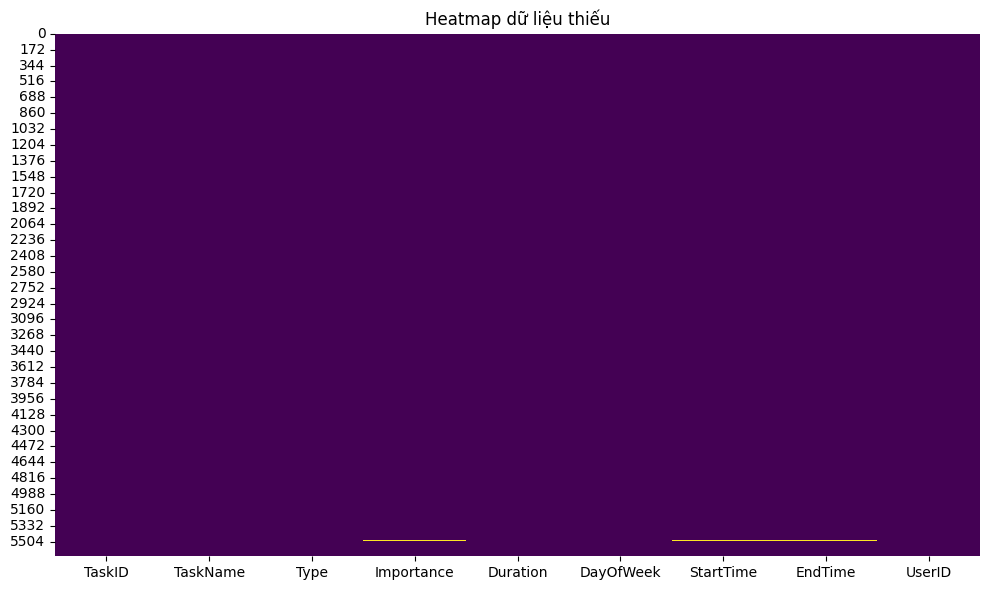

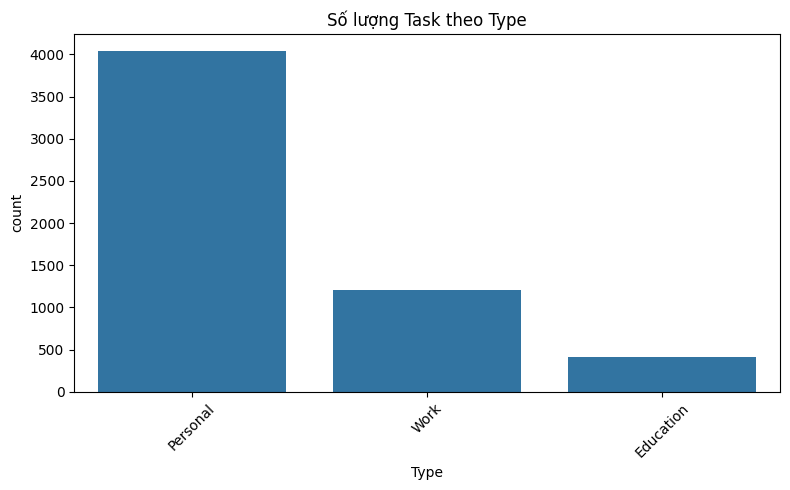

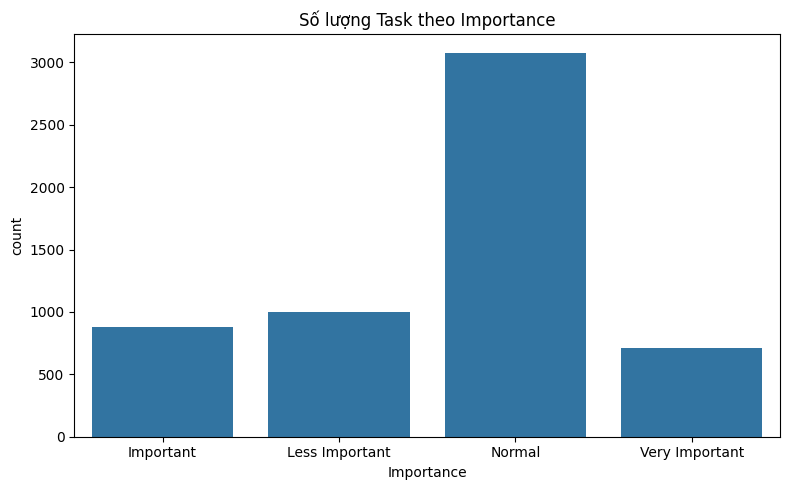

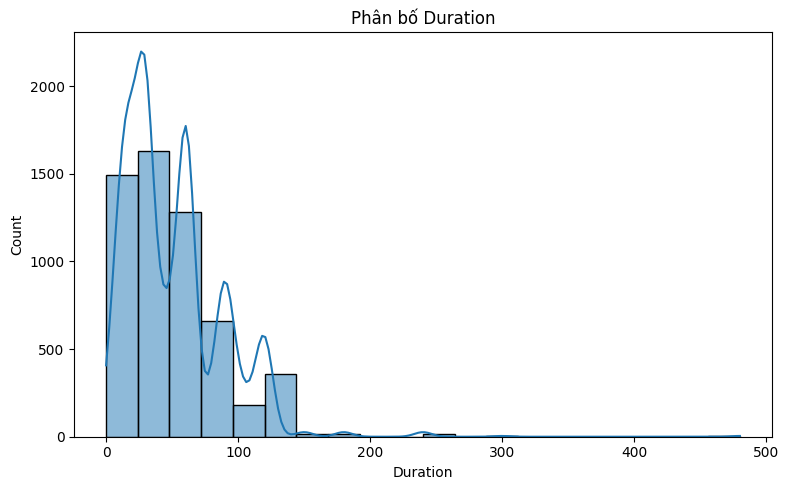

C:\Users\qahhn\AppData\Local\Temp\ipykernel_16908\1824122466.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hours = pd.to_datetime(used_data["StartTime"], errors='coerce').dt.hour.dropna()


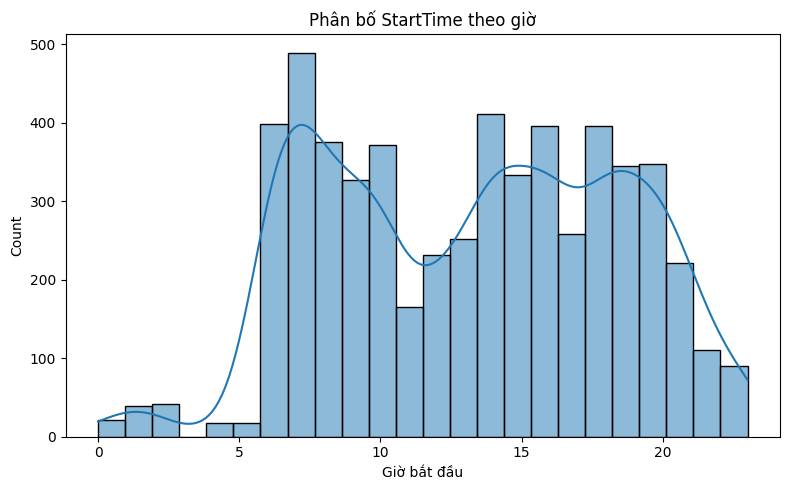

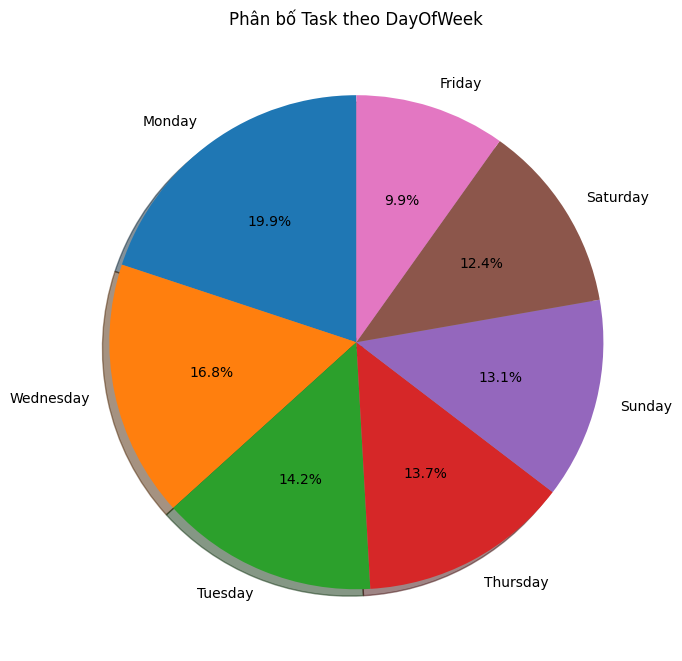

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(used_data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap dữ liệu thiếu")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(data=used_data, x="Type", order=used_data["Type"].value_counts().index)
plt.title("Số lượng Task theo Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=used_data, x="Importance", order=sorted(used_data["Importance"].dropna().unique()))
plt.title("Số lượng Task theo Importance")
plt.tight_layout()
plt.show()

r

if "StartTime" in used_data.columns:
    plt.figure(figsize=(8, 5))
    hours = pd.to_datetime(used_data["StartTime"], errors='coerce').dt.hour.dropna()
    sns.histplot(hours, bins=24, kde=True)
    plt.title("Phân bố StartTime theo giờ")
    plt.xlabel("Giờ bắt đầu")
    plt.tight_layout()
    plt.show()

if "DayOfWeek" in used_data.columns:
    plt.figure(figsize=(7, 7))
    used_data["DayOfWeek"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
    plt.ylabel("")
    plt.title("Phân bố Task theo DayOfWeek")
    plt.tight_layout()
    plt.show()

In [6]:
# Áp dụng quá trình tiền xử lý cho dữ liệu
used_data, task_name_vectorized = preprocess_data(used_data)

used_data

Bắt đầu tiền xử lý dữ liệu...
Kiểm tra dữ liệu thiếu ban đầu:
TaskID        0
TaskName      0
Type          0
Importance    6
Duration      0
DayOfWeek     0
StartTime     6
EndTime       6
UserID        0
dtype: int64
Đã loại bỏ 60 dòng outlier.
Tiền xử lý hoàn tất với các đặc trưng nâng cao.
Tiền xử lý hoàn tất.


,TaskID,TaskName,Type,Importance,Duration,DayOfWeek,StartTime,StartTimeMinutes,Type_LabelEncoded,Type_Education,Type_Personal,Type_Work,DayOfWeek_sin,DayOfWeek_cos
0,409,clean old file,Work,2,0.337787,1,16:30,0.601583,2,0.0,0.0,1.0,0.781831,0.623490
1,1147,update personal profile,Personal,1,-1.042449,4,13:00,-0.074526,1,0.0,1.0,0.0,-0.433884,-0.900969
2,902,go supermarket,Personal,2,-0.582371,5,16:00,0.504996,1,0.0,1.0,0.0,-0.974928,-0.222521
3,547,update personal profile,Personal,1,-1.042449,4,13:00,-0.074526,1,0.0,1.0,0.0,-0.433884,-0.900969
4,1628,write short story,Personal,2,1.257944,2,19:00,1.084518,1,0.0,1.0,0.0,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635,73,foodstuff shopping,Personal,0,0.521818,6,01:00,-2.392615,1,0.0,1.0,0.0,-0.781831,0.623490
5636,1185,congeal alarm,Personal,2,-1.349168,5,22:30,1.760627,1,0.0,1.0,0.0,-0.974928,-0.222521
5637,32,jibe email,Work,2,-1.042449,4,08:00,-1.040396,2,0.0,0.0,1.0,-0.433884,-0.900969
5638,221,direct work,Work,0,0.337787,3,10:30,-0.557461,2,0.0,0.0,1.0,0.433884,-0.900969


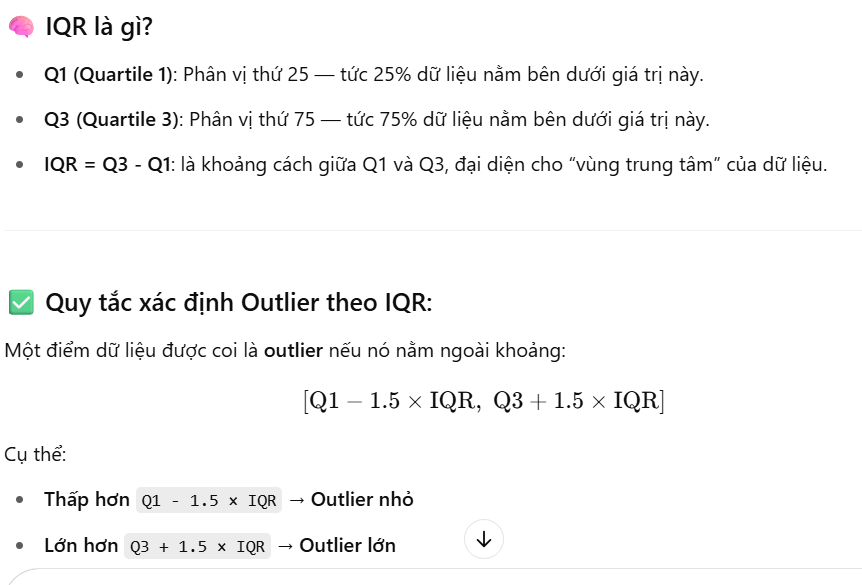

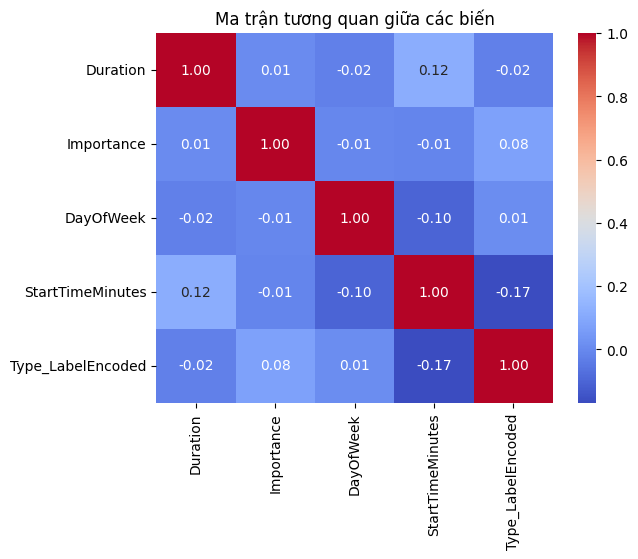

In [7]:
# 1. Heatmap biểu thị tương quan giữa các cột số
plt.figure()
correlation = used_data[["Duration", "Importance", "DayOfWeek", "StartTimeMinutes", "Type_LabelEncoded"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

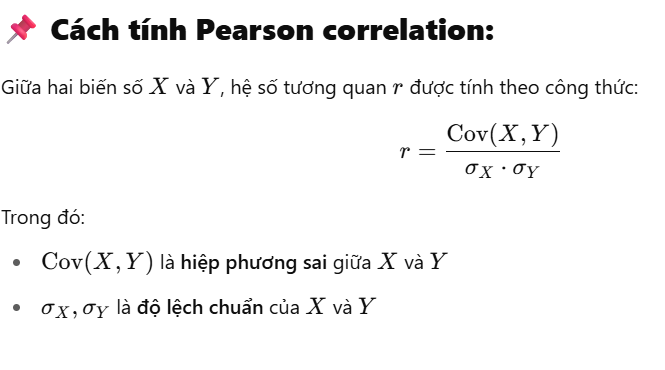

-----type_prediction_model START TRAINNING.-----
Accuracy: 0.9489247311827957
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.94      0.99      0.96       750
           2       0.95      0.85      0.90       291

    accuracy                           0.95      1116
   macro avg       0.97      0.94      0.95      1116
weighted avg       0.95      0.95      0.95      1116

type_prediction_model.pkl have been saved successfully.


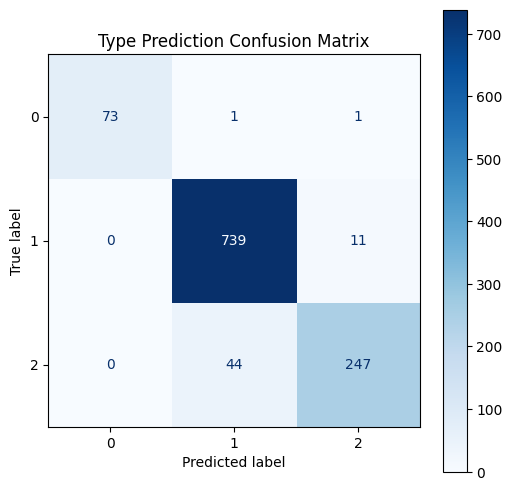

-----importance_prediction_model START TRAINNING.-----
Accuracy: 0.8960573476702509
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       192
           1       0.85      0.88      0.87       199
           2       0.92      0.94      0.93       571
           3       0.88      0.78      0.83       154

    accuracy                           0.90      1116
   macro avg       0.88      0.87      0.87      1116
weighted avg       0.90      0.90      0.90      1116

importance_prediction_model.pkl have been saved successfully.


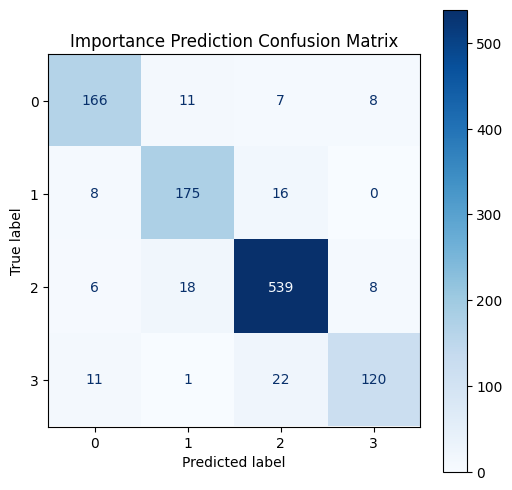

-----duration_prediction_model START TRAINNING.-----
Mean Squared Error (MSE): 0.05
Mean Absolute Error (MAE): 0.06
R-squared (R2): 0.95
duration_prediction_model.pkl have been saved successfully.


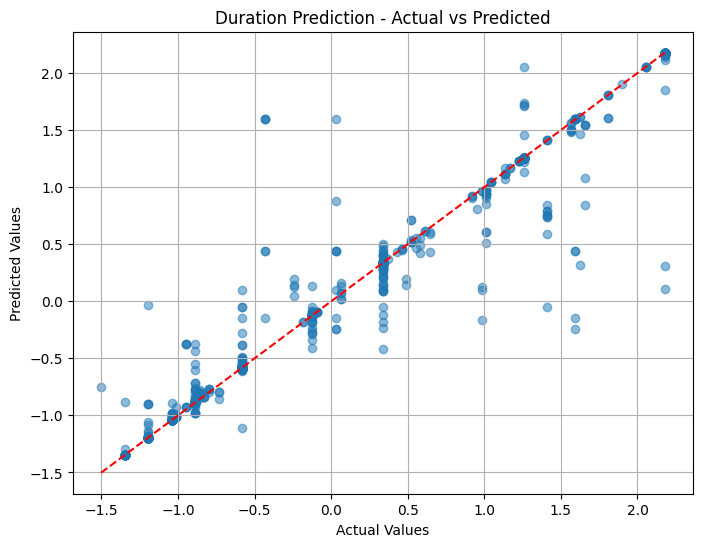

-----start_time_prediction_model START TRAINNING.-----
Mean Squared Error (MSE): 0.10
Mean Absolute Error (MAE): 0.08
R-squared (R2): 0.91
start_time_prediction_model.pkl have been saved successfully.


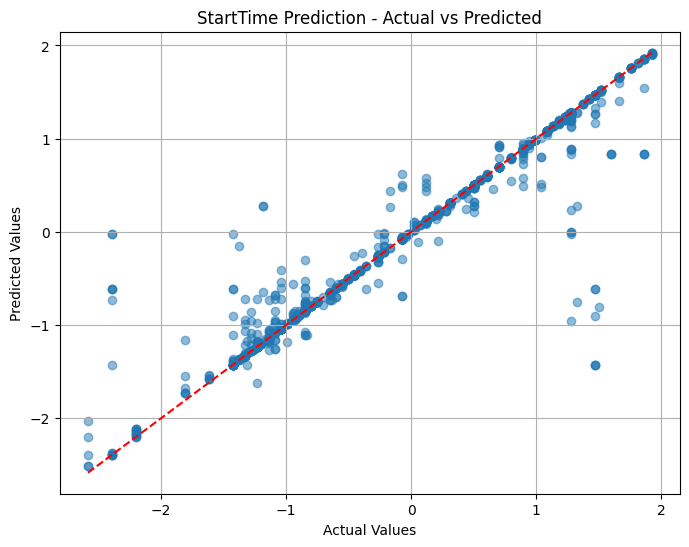

In [8]:
# Huấn luyện và lưu mô hình
# TRAIN TYPE PREDICTION MODEL
# train_type_prediction_model(task_name_vectorized, used_data_type=used_data['Type'], used_data_userid=used_data['UserID'])
# train_type_prediction_model(task_name_vectorized, used_data_type=used_data['Type'])
train_type_prediction_model(task_name_vectorized, used_data_type=used_data['Type_LabelEncoded'])

# TRAIN IMPORTANCE PREDICTION MODEL
# train_importance_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
#                                   used_data_importance=used_data['Importance'], used_data_userid=used_data['UserID'])
# train_importance_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
#                                   used_data_importance=used_data['Importance'])
type_one_hot = used_data[['Type_Education', 'Type_Personal', 'Type_Work']]
train_importance_prediction_model(
    task_name_vectorized,
    used_data_type=type_one_hot,
    used_data_importance=used_data['Importance']
)

# TRAIN DURATION PREDICTION MODEL
# train_duration_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
#                                 used_data_day_of_week=used_data['DayOfWeek'],
#                                 used_data_importance=used_data['Importance'], used_data_userid=used_data['UserID'], used_data_duration=used_data['Duration'])

# train_duration_prediction_model(
#     task_name_vectorized,
#     used_data_type=used_data['Type'],
#     used_data_day_of_week=used_data['DayOfWeek'],
#     used_data_importance=used_data['Importance'],
#     used_data_duration=used_data['Duration'],
# )
train_duration_prediction_model(
    task_name_vectorized,
    # used_data_type=used_data['Type'],
    used_data_type=type_one_hot,
    used_data_DayOfWeek_sin=used_data['DayOfWeek_sin'],
    used_data_DayOfWeek_cos=used_data['DayOfWeek_cos'],
    used_data_importance=used_data['Importance'],
    used_data_duration=used_data['Duration'],
)

#-------------------------
# def time_to_minutes(start_time):
#     hours, minutes = map(int, start_time.split(":"))
#     return hours * 60 + minutes
#
# used_data['StartTimeMinutes'] = used_data['StartTime'].apply(time_to_minutes)

# required_columns = used_data[['Type', 'Importance', 'DayOfWeek', 'StartTime_sin', 'StartTime_cos',]]
# required_columns = used_data[['Type', 'Importance', 'DayOfWeek']]
# required_columns = used_data[['Type', 'Importance', 'DayOfWeek_sin', 'DayOfWeek_cos']]

required_columns = pd.concat([
    type_one_hot.reset_index(drop=True),
    used_data[['Importance', 'DayOfWeek_sin', 'DayOfWeek_cos']].reset_index(drop=True)
], axis=1)

train_start_time_prediction_model_2(task_name_vectorized, required_columns=required_columns,
                                  start_time_minutes=used_data['StartTimeMinutes'])